#**Ejercicios sobre RNC**
###**Elaborado por:**Antonella Arcos

El conjunto de datos de moda MNIST es otro conjunto popular para la evaluación de modelos de visión computarizada. Consiste de 60,000 imágenes de entrenamiento, cada una es una imagen en escala de grises de 28x28, proveniente de 1 de 10 clases:

0 Polera/top
1 Pantalón
2 Suéter
3 Vestido
4 Abrigo
5 Sandalia
6 Camisa
7 Zapatilla
8 Bolso
9 Botín
Tu tarea es usar una RNC para clasificar las imágenes como uno de los 10 artículos de vestimenta. Puedes descargar los datos desde Kaggle. Trata de construir el mejor modelo posible (que tenga la mayor precisión en los datos de prueba).

In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# Obtener datos
test_df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_11/fashion-mnist_test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_11/fashion-mnist_train.csv')

In [34]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data = pd.concat([test_df,train_df],axis=0,ignore_index=True)

In [36]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.shape

(70000, 785)

In [38]:
data["label"].value_counts()

0    7000
1    7000
2    7000
3    7000
8    7000
6    7000
5    7000
4    7000
7    7000
9    7000
Name: label, dtype: int64

In [39]:
label = pd.DataFrame(data["label"].value_counts(),columns=["label"])

In [40]:
X_train = data.drop("label",axis=1)

In [41]:
Y_train = data["label"]

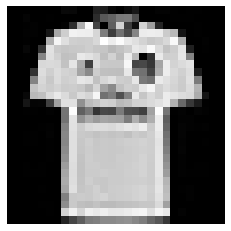

In [42]:
img = X_train.iloc[0].values
img = img.reshape(28,28)
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()

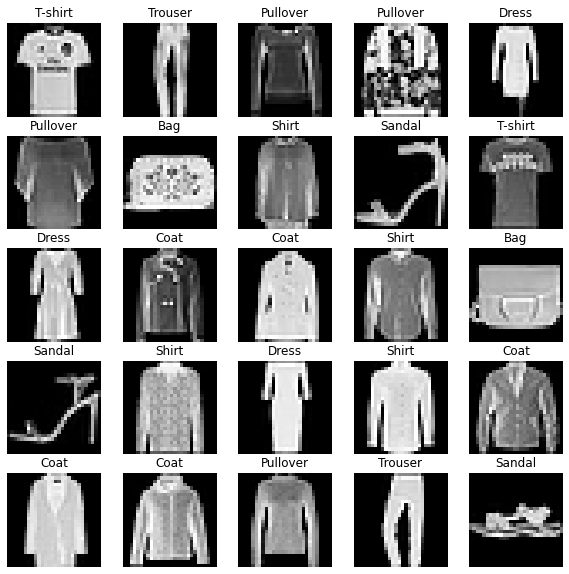

In [43]:
names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train.iloc[i].values.reshape((28,28)),cmap="gray")
    index = int(Y_train[i])
    plt.axis("off")
    plt.title(names[index])
plt.show() 

In [45]:
# Escalar datos entre 0 y 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [46]:
X_train = X_train.values.reshape(-1,28,28,1)
print(X_train.shape)

(70000, 28, 28, 1)


In [47]:
Y_train =Y_train.values.reshape(-1,1)

In [48]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X_train,
                                                 Y_train,
                                                 test_size=0.2,
                                                 random_state=11)

In [50]:
print("x_train shape:{}\nx_test shape:{}".format(x_train.shape,x_test.shape))
print("y_train shape:{}\ny_test shape:{}".format(y_train.shape,y_test.shape))

x_train shape:(56000, 28, 28, 1)
x_test shape:(14000, 28, 28, 1)
y_train shape:(56000, 10)
y_test shape:(14000, 10)


In [51]:
# Paso 1: Definir nuestra estructura de red
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [52]:
# Modelo secuencial
model = Sequential()

In [53]:
# Capa convolucional
model.add(Conv2D(filters = 8, # Cuantos filtros quieres usar
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # ¿Cuál es la forma de tus características de entrada (definimos esto arriba)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos
                activation = 'softmax')) # ¿Qué función de activación estás usando?

In [54]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])


In [64]:
# Paso 3: ajustar nuestro modelo
history= model.fit(x_train,
                   y_train,
                   validation_data=(x_test,y_test),
                   epochs=50)

Epoch 1/50
1750/1750 [==============================] - 18s 10ms/step - loss: 0.3842 - acc: 0.8673 - val_loss: 0.4037 - val_acc: 0.8594
Epoch 2/50
1750/1750 [==============================] - 21s 12ms/step - loss: 0.3834 - acc: 0.8669 - val_loss: 0.3982 - val_acc: 0.8601
Epoch 3/50
1750/1750 [==============================] - 15s 8ms/step - loss: 0.3816 - acc: 0.8683 - val_loss: 0.3995 - val_acc: 0.8608
Epoch 4/50
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3804 - acc: 0.8673 - val_loss: 0.4010 - val_acc: 0.8585
Epoch 5/50
1750/1750 [==============================] - 17s 9ms/step - loss: 0.3789 - acc: 0.8687 - val_loss: 0.3922 - val_acc: 0.8635
Epoch 6/50
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3776 - acc: 0.8691 - val_loss: 0.3927 - val_acc: 0.8635
Epoch 7/50
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3766 - acc: 0.8699 - val_loss: 0.3937 - val_acc: 0.8630
Epoch 8/50
1750/1750 [==============================]

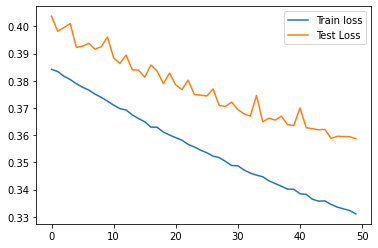

In [65]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

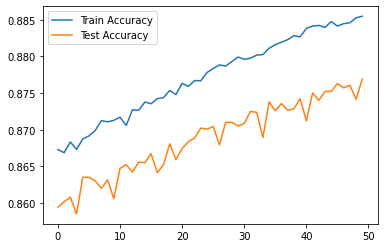

In [66]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();


In [ ]:
#podemos ver que con 50 epochs obtenemos una precision de casi el 88%.

In [61]:
# Paso 3: ajustar nuestro modelo
history= model.fit(x_train,
                   y_train,
                   validation_data=(x_test,y_test),
                   epochs=20)

Epoch 1/20
1750/1750 [==============================] - 61s 35ms/step - loss: 0.4200 - acc: 0.8539 - val_loss: 0.4260 - val_acc: 0.8495
Epoch 2/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.4157 - acc: 0.8563 - val_loss: 0.4298 - val_acc: 0.8449
Epoch 3/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.4132 - acc: 0.8566 - val_loss: 0.4282 - val_acc: 0.8499
Epoch 4/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.4106 - acc: 0.8579 - val_loss: 0.4209 - val_acc: 0.8516
Epoch 5/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.4090 - acc: 0.8581 - val_loss: 0.4203 - val_acc: 0.8525
Epoch 6/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.4075 - acc: 0.8588 - val_loss: 0.4181 - val_acc: 0.8545
Epoch 7/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.4056 - acc: 0.8600 - val_loss: 0.4173 - val_acc: 0.8551
Epoch 8/20
1750/1750 [==============================] 

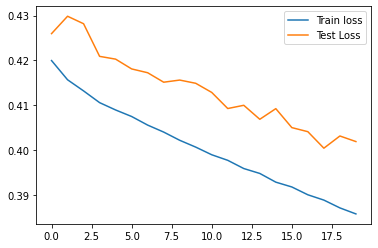

In [62]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

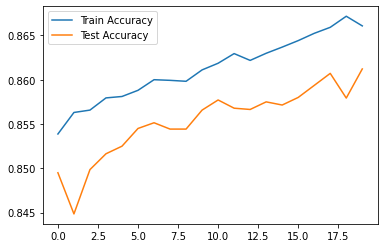

In [63]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();


In [ ]:
#Con 20 epochs alcanzamos el 86% de precisión en los datos de prueba

In [67]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history= model.fit(x_train,
                   y_train,
                   validation_data=(x_test,y_test),
                   epochs=30,
                   callbacks =[earlystopping])

Epoch 1/30
1750/1750 [==============================] - 18s 10ms/step - loss: 0.3305 - acc: 0.8859 - val_loss: 0.3565 - val_acc: 0.8767
Epoch 2/30
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3295 - acc: 0.8868 - val_loss: 0.3554 - val_acc: 0.8777
Epoch 3/30
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3286 - acc: 0.8862 - val_loss: 0.3553 - val_acc: 0.8766
Epoch 4/30
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3279 - acc: 0.8867 - val_loss: 0.3533 - val_acc: 0.8783
Epoch 5/30
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3274 - acc: 0.8866 - val_loss: 0.3553 - val_acc: 0.8776
Epoch 6/30
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3265 - acc: 0.8874 - val_loss: 0.3517 - val_acc: 0.8780
Epoch 7/30
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3260 - acc: 0.8867 - val_loss: 0.3571 - val_acc: 0.8749
Epoch 8/30
1750/1750 [==============================] 

Se van a intentar con 11 epochs ya que después de eso se sobreajusta el modelo. 
Para esto se toma como referencia:
https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

In [68]:
# Paso 3: ajustar nuestro modelo
history= model.fit(x_train,
                   y_train,
                   validation_data=(x_test,y_test),
                   epochs=11)

Epoch 1/11
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3254 - acc: 0.8866 - val_loss: 0.3521 - val_acc: 0.8782
Epoch 2/11
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3252 - acc: 0.8875 - val_loss: 0.3552 - val_acc: 0.8779
Epoch 3/11
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3243 - acc: 0.8878 - val_loss: 0.3511 - val_acc: 0.8785
Epoch 4/11
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3237 - acc: 0.8875 - val_loss: 0.3519 - val_acc: 0.8773
Epoch 5/11
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3233 - acc: 0.8878 - val_loss: 0.3506 - val_acc: 0.8788
Epoch 6/11
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3219 - acc: 0.8878 - val_loss: 0.3509 - val_acc: 0.8775
Epoch 7/11
1750/1750 [==============================] - 19s 11ms/step - loss: 0.3215 - acc: 0.8888 - val_loss: 0.3478 - val_acc: 0.8814
Epoch 8/11
1750/1750 [==============================] 

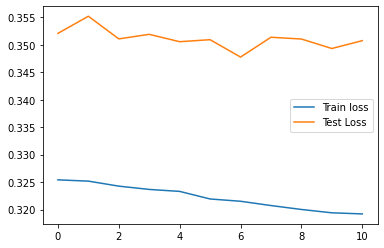

In [69]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

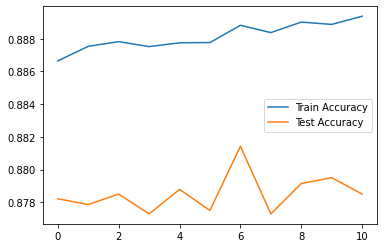

In [70]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

La precisión con un modelo que no está sobreajustado llega casi al 88%.